In [1]:
#imports
import tensorflow as ts
import keras as ks
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import time
import random

from numpy.random import seed
from random import randint
from keras.datasets import mnist
from keras.layers import Dense,Activation,Conv2D,MaxPool2D,Flatten
from keras.optimizers import Adam
from keras.models import Model, Input
from keras.utils import to_categorical,np_utils
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display
from PIL import Image

def done():
    print("DONE")
def nl():
    print("")
    
done()

/home/frost/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


DONE


In [2]:
#magic numbers
seed(42)
#nr_classes=10
#class_labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#nr_neurons_in_layer=10
my_optimizer=Adam()
my_batch_size=128
pixels_ox=224
pixels_oy=224
my_epochs=1


done()

DONE


In [3]:
training_path=('customdataset/train')
validating_path=('customdataset/valid')
testing_path=('customdataset/test')
train_batches=ImageDataGenerator().flow_from_directory(training_path, target_size=(pixels_ox, pixels_oy),classes=['face','motorbike','watch'], batch_size=16)
valid_batches=ImageDataGenerator().flow_from_directory(validating_path, target_size=(pixels_ox, pixels_oy),classes=['face','motorbike','watch'], batch_size=16)
test_batches=ImageDataGenerator().flow_from_directory(testing_path, target_size=(pixels_ox, pixels_oy),classes=['face','motorbike','watch'], batch_size=16)
done()




Found 1472 images belonging to 3 classes.
Found 367 images belonging to 3 classes.
Found 145 images belonging to 3 classes.
DONE


In [4]:
train_images,train_labels=next(train_batches)
test_images,test_labels=next(test_batches)
print(train_images.shape)
done()

(16, 224, 224, 3)
DONE


DONE


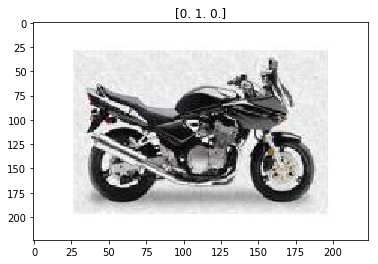

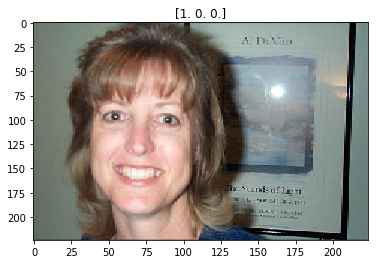

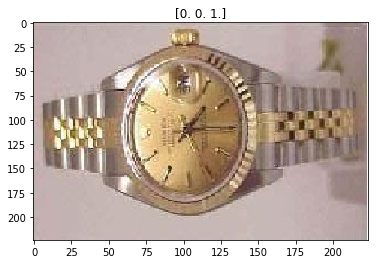

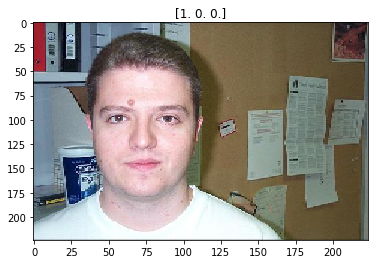

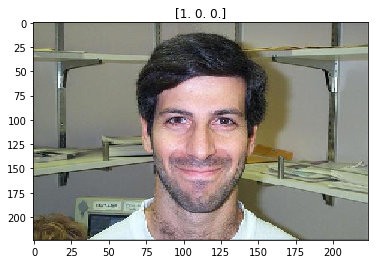

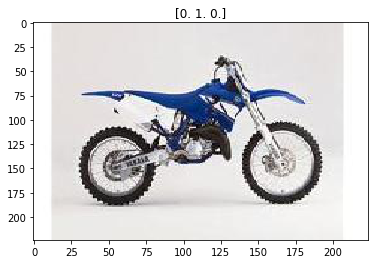

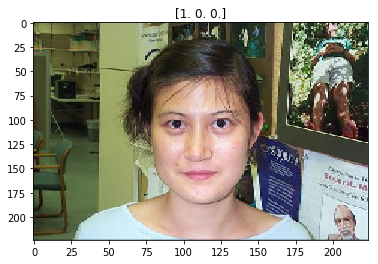

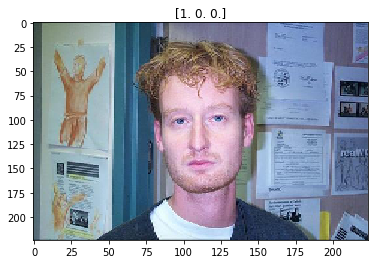

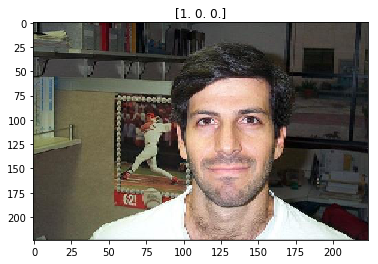

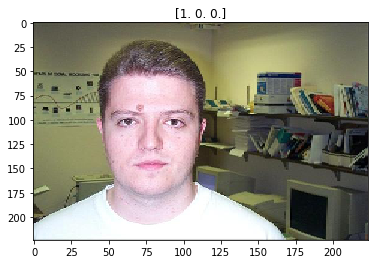

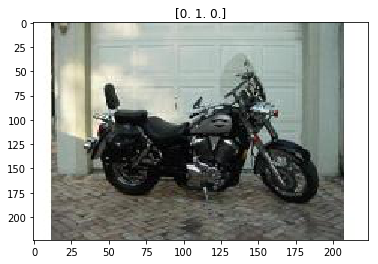

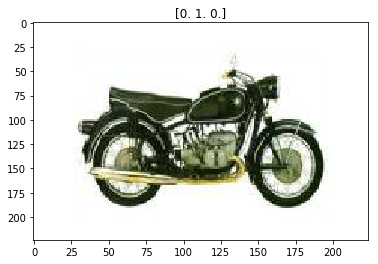

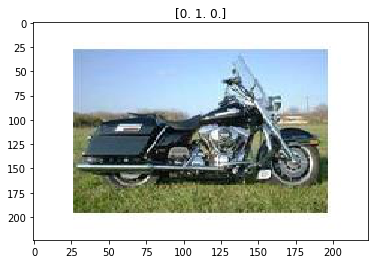

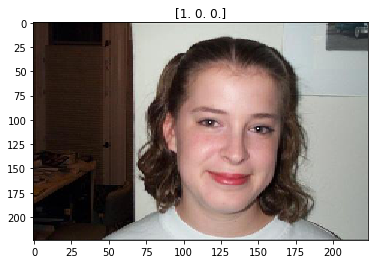

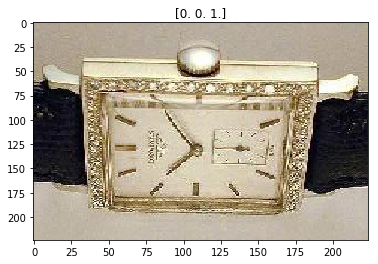

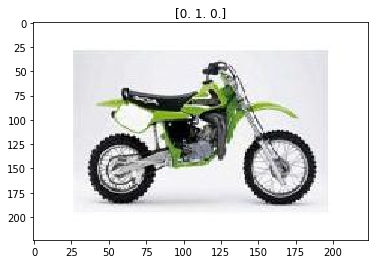

In [5]:

for image,label in zip(train_images,train_labels):
    my_image=image.copy()
    my_image/=255
    plt.figure()    
    plt.title(label)
    plt.imshow(my_image,aspect='auto')
    
done()

In [6]:
base_model=ks.applications.vgg16.VGG16()

#base_model.summary()

print("")
print("")
print("")

base_model.layers.pop()
#base_model.summary()

print("")
print("")
print("")

#easier way to do this?
output=Dense(3,activation='softmax')(base_model.layers[-1].output)

new_model=Model(base_model.input,output)

new_model.summary()

print("")
print("")
print("")
#print(new_model.input)
#print(new_model.output)
#print(new_model.layers[-1].input)
#print(new_model.layers[-1].output)

#how do you search for a particular layer, especially if it's multi input/multi output?

553467904/553467096 [==============================] - 474s 1us/step






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
b

In [7]:
print(len(new_model.layers))
nr_of_layers=len(new_model.layers)

for layer in new_model.layers:
    print(layer)
    
print("")
print("")
print("")
print("")

for i in range(0,nr_of_layers):
    print(new_model.layers[i].trainable,new_model.layers[i])


for i in range(0,nr_of_layers-1):
    new_model.layers[i].trainable=False

print("")
print("")
print("")
print("")    
    
    
for i in range(0,nr_of_layers):
    print(new_model.layers[i].trainable,new_model.layers[i])    

23




False <keras.engine.input_layer.InputLayer object at 0x7f1de8ec06d8>
True <keras.layers.convolutional.Conv2D object at 0x7f1de8ec0400>
True <keras.layers.convolutional.Conv2D object at 0x7f1de8e84dd8>
True <keras.layers.pooling.MaxPooling2D object at 0x7f1de9cb1940>
True <keras.layers.convolutional.Conv2D object at 0x7f1de8fb9470>
True <keras.layers.convolutional.Conv2D object at 0x7f1de8e36198>
True <keras.layers.pooling.MaxPooling2D object at 0x7f1de8dcf0b8>
True <keras.layers.convolutional.Conv2D object at 0x7f1de8dcf668>
True <keras.layers.convolutional.Conv2D object at 0x7f1de8de63c8>
True <keras.layers.convolutional.Conv2D object at 0x7f1de8d800f0>
True <keras.layers.pooling.MaxPooling2D object at 0x7f1de8d9b438>
True <keras.layers.convolutional.Conv2D object at 0x7f1de8d9be48>
True <keras.layers.convolutional.Conv2D object at 0x7f1de8d51278>
True <keras.layers.convolutional.Conv2D object at 0x7f1de8d6c320>
True <keras.layers.pooling.MaxPooling2D object at 0x7f1de8e93b70>


In [8]:
#COMPILATION
new_model.compile(loss="categorical_crossentropy", optimizer=my_optimizer, metrics=['accuracy'])

done()

DONE


In [10]:
new_model.fit_generator(train_batches,
             epochs=my_epochs,
             validation_data=valid_batches,
             verbose=1)

Epoch 1/1
92/92 [==============================] - 14s 152ms/step - loss: 1.6916e-04 - acc: 1.0000 - val_loss: 3.5484e-05 - val_acc: 1.0000


In [110]:
train_score = new_model.evaluate(train_images, train_labels)
test_score = new_model.evaluate(test_images,test_labels)
print("accuracy: ",train_score[1])
print("accuracy: ",test_score[1])


16/16 [==============================] - 5s 318ms/step
accuracy:  1.0
accuracy:  1.0
